In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
%load_ext google.colab.data_table


In [13]:
url = r"/content/drive/MyDrive/Shark Attack/attacks.csv"  # https://drive.google.com/file/d/1vv3SSxlBZh0Uew4SQvVXkw_Kx7jmxyXd/view?usp=sharing Public link naar csv file
df = pd.read_csv(url, encoding='latin', index_col=0)
df = df.drop(["pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Unnamed: 22", "Unnamed: 23"], axis=1)  #drop koloms die we vermoedelijk niet nodig hebben
df = df.dropna(how='all')  # verwijder rows waar alle data Nan is, we begonnen met 25723 rijen en we hebben nog 6309 rijen over
df = df.rename(columns={"Species ": "Species"}) # spatie uit de kolomnaam gehaald
df = df.rename(columns={"Fatal (Y/N)": "Fetal"}) # kolomnaam aangepast
df = df.reset_index(drop=True) #index terug gezet naar integer, personal prefrence


In [14]:
#@title Vraag 1
def antwoord_vraag1():
  # vraag 1 What are the most dangerous types of sharks to humans?
  # Bij het opschonen alle NaN weg gehaald, voor de rest de data intact gehouden we hielden 3464 rijen over
  # eerst een script gedraait die de eerste 100 rijen lieten zien, uit deze rijen de unieke shark soorten handmatig overgenomen
  # vervolgens itereer ik over alle rijen in de dataframe en kijk ik of een van de soorten uit de shark_uniek_list voort komt
  # het antwoord in een verticale bar chart gezet
  # het antwoord heeft weinig toegevoegde waarde, gezien de aangeleverde data vaak onjuist of onbekend was

  shark_uniek_list = ["white shark", "tiger shark", "lemon shark", "blue pointer", "grey nurse shark", 
                      "juvenile white shark", "sandtiger shark", "bull shark", "wobbegong shark", "grey reef shark",
                      "galapagos shark", "spinner shark", "seven-gill shark", "dogfish shark", "blacktip shark",
                      "silky shark", " bronze whaler shark", "mako shark", "oceanic whitetip shark", "raggedtooth shark",
                      "goblin shark", "caribbean reef shark", "sandbar shark", " tawney nurse shark", "porbeagle shark",
                      "salmon shark", "blue shark", "port Jackson shark"]
  shark_counter = []
  df2 = df.loc[:, "Species"]
  df2 = df2.dropna()
  df3 = df2

  for index, data in df2.items():
      data = data.lower()
      for species in shark_uniek_list:
          if species in data:
              shark_counter.append(species)

  df4 = pd.DataFrame({'Soort': shark_counter})
  df4 = df4.groupby(['Soort']).size().reset_index(name='Amount')
  df4 = df4.sort_values(by='Amount', ascending=False)
  df4 = df4.head(10)

  fig, ax = plt.subplots()
  ax.set_title("What are the most dangerous types of sharks to humans?")
  x = df4["Soort"]
  y = df4["Amount"]
  ax.set_ylabel("Amount")
  ax.set_xlabel("Soort")
  ax.xaxis.set_tick_params(rotation=45)
  ax.grid(axis="y")
  plt.bar(x,y)
  plt.show()



In [19]:
#@title Vraag 2
def antwoord_vraag2():
  # Vraag 2 Are children more likely to be attacked by sharks?

  # Er zijn veel meer aanvallen op volwassenen dan op kinderen, maar er zijn ook veel meer volwassenen dan kinderen.
  # Relatief gezien, (100/3363)*1055 = 31% van de aanvallen is op een kind.
  # Volgens data.unicef.org (shorturl.at/GPS09) is momenteel 16% van de populatie kind.
  # Oftewel 31% van de aanvallen is op 16% van de populatie, dus je zou kunnen zeggen dat een kind een grotere kans heeft om aangevallen te worden dan een volwassenen.

  df_age = df.loc[:, "Age"]
  df_age.dropna(inplace=True)
  preg_match = r'^([1-9]\d?|0|100)$'
  list_ages = []
  list_color = []


  for x in df_age:
    if re.match(preg_match, x):
      x = int(x)
      list_ages.append(x)


  df_age2 = pd.DataFrame({'Ages': list_ages})
  df_age2 = df_age2.groupby(['Ages']).size().reset_index(name='Amount')
  df_age2 = df_age2.sort_values(by='Ages', ascending=True)


  for x in df_age2["Ages"]:
    if x <= 18:
      list_color.append("green")
    else:
      list_color.append("red")


  fig, ax = plt.subplots()
  ax.set_title("Are children more likely to be attacked by sharks?")
  x = df_age2["Ages"]
  y = df_age2["Amount"]
  ax.set_ylabel("Amount")
  ax.set_xlabel("Ages")
  ax.xaxis.set_tick_params(rotation=45)
  ax.margins(x=0.02)
  ax.grid(axis="y")
  plt.bar(x, y, color=list_color)
  plt.show()

  print("")
  print(f"Totaal aantal kinderen {df_age2[df_age2['Ages'] <= 18]['Amount'].sum()}")
  print(f"Totaal aantal volwassenen {df_age2[df_age2['Ages'] > 18]['Amount'].sum()}")

In [30]:
#@title Vraag 3
def antwoord_vraag3():
  # vraag 3

  # Are shark attacks were sharks were provoked more or less dangerous?
  # Volgens de chart vrij duidelijk antwoord, provoked is velen malen

  df_fetal = df.loc[:, ["Type", "Fetal"]]
  df_fetal = df_fetal.dropna(how="any")
  df_fetal = df_fetal[(df_fetal['Type'] == 'Unprovoked') | (df_fetal['Type'] == 'Provoked')] # pak alleen data met "unprovoked" of "provoked"
  df_fetal['Fetal'] = df_fetal['Fetal'].replace(' N', 'N')
  df_fetal['Fetal'] = df_fetal['Fetal'].replace('y', 'Y')
  df_fetal = df_fetal[(df_fetal['Fetal'] == "N") | (df_fetal['Fetal'] == 'Y')]


  # berekening percentages provoked
  provoked = df_fetal[df_fetal["Type"] == "Provoked"]
  total_provoked = len(provoked)
  provoked_fetal = df_fetal[(df_fetal["Type"] == "Provoked") & (df_fetal["Fetal"] == "Y")]
  provoked_percentage_fetal = round((100 / total_provoked) * len(provoked_fetal))
  provoked_percentage_not_fetal = 100 - provoked_percentage_fetal

  

  # berekening percentages unprovoked
  unprovoked = df_fetal[df_fetal["Type"] == "Unprovoked"]
  total_unprovoked = len(unprovoked)
  unprovoked_fetal = df_fetal[(df_fetal["Type"] == "Unprovoked") & (df_fetal["Fetal"] == "Y")]
  unprovoked_percentage_fetal = round((100 / total_unprovoked) * len(unprovoked_fetal))
  unprovoked_percentage_not_fetal = 100 - unprovoked_percentage_fetal

  labels = ["Unprovoked", "Provoked"]
  Fetal_percentage = [provoked_percentage_fetal, unprovoked_percentage_fetal]
  Not_fetal_percentage = [provoked_percentage_not_fetal, unprovoked_percentage_not_fetal]


  fig = plt.figure(figsize=(6, 5))
  ax = fig.add_subplot(111)
  ax.bar(labels, Fetal_percentage, label="Fetal", width=0.4)
  ax.bar(labels, Not_fetal_percentage, bottom=Fetal_percentage, label="Not Fetal", width=0.4)

  ax.set_title("Are shark attacks were sharks were provoked more or less dangerous?")
  ax.set_xlabel("Type")
  ax.set_ylabel("Percentage")
  ax.legend(loc="upper right")
  ax.grid(axis="y")
  plt.show()



In [17]:
#@title Vraag 4
def antwoord_vraag4():
  # Vraag 4
  # Are certain activities more likely to result in a shark attack?

  df_activity = df.loc[:, "Activity"]
  df_activity = df_activity.dropna()

  list_activities = ["swimming", "fishing", "diving", "body surfing", 
                    "treading water", "spearfishing", "paddling", "wading", "kayaking",
                    "snorkeling", "kite surfing", "body boarding", "paddle boarding"]
  activity_count = []

  # print(len(df_activity)) # 1422 activities

  for x in df_activity:
    x = x.lower()
    for action in list_activities:
      if x in action:
        activity_count.append(action)


  df_activity2 = pd.DataFrame({"Activity": activity_count})
  df_activity2 = df_activity2.groupby(["Activity"]).size().reset_index(name="Amount")
  df_activity2 = df_activity2.sort_values(by="Amount", ascending=False)
  df_activity2 = df_activity2.head(10)


  fig, ax = plt.subplots()
  ax.set_title("Are certain activities more likely to result in a shark attack?")
  x = df_activity2["Activity"]
  y = df_activity2["Amount"]
  ax.set_ylabel("Amount")
  ax.set_xlabel("Activity")
  ax.xaxis.set_tick_params(rotation=45)
  ax.grid(axis="y")
  plt.bar(x,y)
  plt.show()







Er is een flinke bias aanwezig als het gaat over haaien, maar dat is meer de bekendheid van het beest zelf.
Tegendeel was bij mij wel bekend, 1 op 37 miljoen mensen word gebeten door een haai en een fractie daarvan overleid.
Als je dit bijvoorbeeld vergelijkd met de kans van 1 op 11 miljoen dat je overleid in een vliegtuigongeluk
Terwijl mensen een stuk banger zijn voor de haai dan voor een vliegrit.
Echter had ik alleen een bias bij vraag 3, voor de rest was ik er nog niet mee bekend.

Vraag 1
What are the most dangerous types of sharks to humans?

Het antwoord is vrij duidelijk kijkend naar de grafiek, white sharks zijn bij een grote marge het meest gevaarlijk



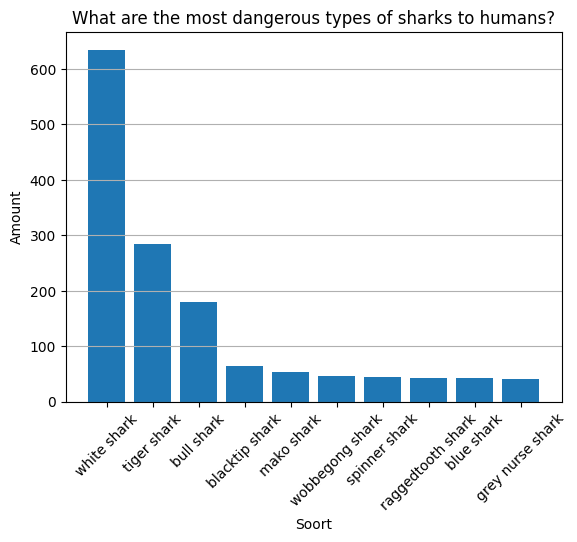


Vraag 2
Are children more likely to be attacked by sharks?

Er zijn zoals je kan zien veel meer aanvallen op volwassenen dan kinderen.
Volgens de website data.unicef.org is momenteel 16% van de wereld bevolking onder de 18.
Echter is wel 31% van de incidenten bij kinderen gebeurd, kinderen hebben dus wel een veel grotere kans om aangevallen te worden.



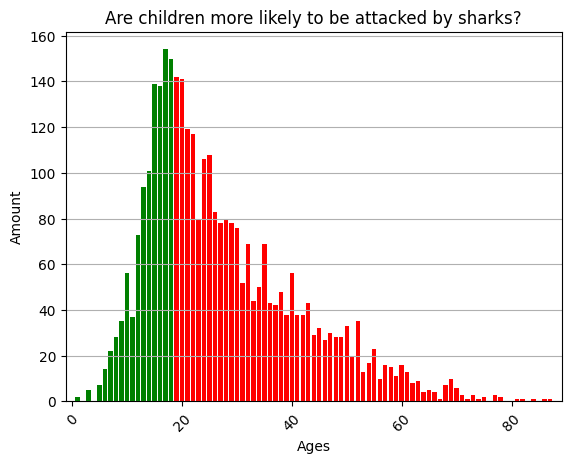


Totaal aantal kinderen 1055
Totaal aantal volwassenen 2308

Vraag 3
Are shark attacks were sharks were provoked more or less dangerous?

Begonnen met een flinke bias, het lijkt me erg logische dat provoked sharks gevraarlijker zijn dan shark die we met rust laten.
Een beetje het zelfde effect als stieren vechten, ze zijn vele malen argressiever als je ze uitdaagd

Het effect is ook duidelijk terug te zien, maar 3% van de unprovoked eindigde in een incident.
Terwijl 26% van de provoked eindigd in een incident.



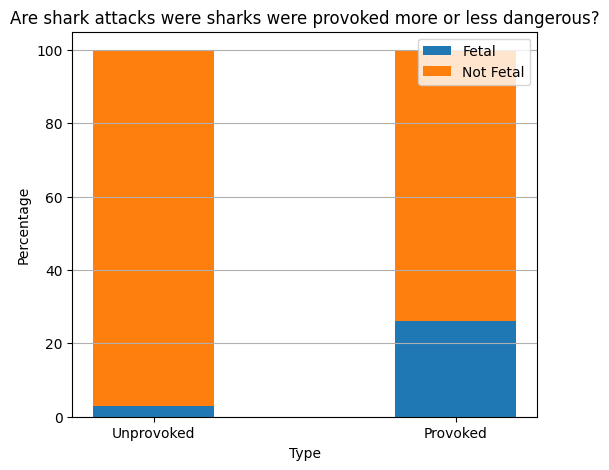


Vraag 4
Are certain activities more likely to result in a shark attack?

Het verschil in activiteiten is hier stukken minder groot, terwijl er wel een duidelijk top 4 is.



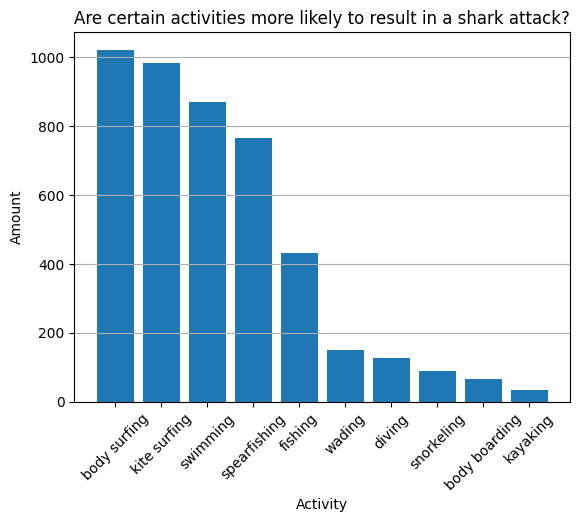

In [34]:
#@title Antwoorden
print("Er is een flinke bias aanwezig als het gaat over haaien, maar dat is meer de bekendheid van het beest zelf.")
print("Tegendeel was bij mij wel bekend, 1 op 37 miljoen mensen word gebeten door een haai en een fractie daarvan overlijdt.")
print("Als je dit bijvoorbeeld vergelijkd met de kans van 1 op 11 miljoen dat je overlijdt in een vliegtuigongeluk")
print("Terwijl mensen een stuk banger zijn voor de haai dan voor een vliegrit.")
print("Echter had ik alleen een bias bij vraag 3, voor de rest was ik er nog niet mee bekend.")
print("")
print("Vraag 1")
print("What are the most dangerous types of sharks to humans?")
print("")
print("Het antwoord is vrij duidelijk kijkend naar de grafiek, white sharks zijn bij een grote marge het meest gevaarlijk")
print("")
antwoord_vraag1()
print("")
print("Vraag 2")
print("Are children more likely to be attacked by sharks?")
print("")
print("Er zijn zoals je kan zien veel meer aanvallen op volwassenen dan kinderen.")
print("Volgens de website data.unicef.org is momenteel 16% van de wereld bevolking onder de 18.")
print("Echter is wel 31% van de incidenten bij kinderen gebeurd, kinderen hebben dus wel een veel grotere kans om aangevallen te worden.")
print("")
antwoord_vraag2()
print("")
print("Vraag 3")
print("Are shark attacks were sharks were provoked more or less dangerous?")
print("")
print("Begonnen met een flinke bias, het lijkt me erg logische dat provoked sharks gevraarlijker zijn dan shark die we met rust laten.")
print("Een beetje het zelfde effect als stieren vechten, ze zijn vele malen argressiever als je ze uitdaagd")
print("")
print("Het effect is ook duidelijk terug te zien, maar 3% van de unprovoked eindigde in een incident.")
print("Terwijl 26% van de provoked eindigd in een incident.")
print("")
antwoord_vraag3()
print("")
print("Vraag 4")
print("Are certain activities more likely to result in a shark attack?")
print("")
print("Het verschil in activiteiten is hier stukken minder groot, terwijl er wel een duidelijk top 4 is.")
print("")
antwoord_vraag4()